In [1]:
# Optimal timing of decarbonisation measures
import pulp as p
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# decarbonisation measures
MEASURES = [0, 1]

# time steps
TIME = [0, 1, 2, 3, 4, 5]
TIME1 = [1, 2, 3, 4, 5]

# costs of decarbonisation measures
COSTS = [10, 20]

# velocities of implementation of decarbonisation measures
VELOCITIES = [1, 5]

# baseline CO2 emissions
Eref = [100, 100, 100, 100, 100]

# time step
Deltat = 1

In [3]:
problem = p.LpProblem('Optimal_Timing', p.LpMinimize)

In [4]:
# abatement of CO2 for different measures and time steps
a = p.LpVariable.dicts("abatement", [(i, t) for i in MEASURES for t in TIME], lowBound = 0, upBound = 100, cat='Continuous')

In [5]:
# CO2 emissions
e = p.LpVariable.dicts("emissions", [t for t in TIME], lowBound = 0, upBound = 100, cat='Continuous')

In [6]:
# Objective Function, minimise costs of decarbonisation measures
problem += p.lpSum(COSTS[i]*a[(i, t)] for i in MEASURES for t in TIME)

In [7]:
# initial condition on CO2 abatement
for i in MEASURES:
    problem += (a[(i, 0)] == 0)

In [8]:
# constraint on velocity of variation of abatement
for i in MEASURES:
    for t in TIME1:
        problem += (a[(i, t)] - a[(i, t-1)] <= Deltat*VELOCITIES[i])

In [9]:
# constraint for calculation of emissions considering abatement
for t in TIME:
    problem += (e[t] == Eref[t-1] - p.lpSum(a[(i,t)] for i in MEASURES))

In [10]:
# emission target at the end of the optimisation period
problem += e[5] <= 77.2345

In [11]:
# solve the problem
status = problem.solve()   # Solver
print(p.LpStatus[status]) 

Optimal


In [12]:
# print results
print("CO2 abatement:")
for i in MEASURES:
    print("Measure ", i)
    for t in TIME:
        print("t =", t, " a =", a[(i, t)].varValue)

print("Emissions:")        
for t in TIME:
    print("t =", t, " e =", e[t].varValue)

CO2 abatement:
Measure  0
t = 0  a = 0.0
t = 1  a = 1.0
t = 2  a = 2.0
t = 3  a = 3.0
t = 4  a = 4.0
t = 5  a = 5.0
Measure  1
t = 0  a = 0.0
t = 1  a = 0.0
t = 2  a = 2.7655
t = 3  a = 7.7655
t = 4  a = 12.7655
t = 5  a = 17.7655
Emissions:
t = 0  e = 100.0
t = 1  e = 99.0
t = 2  e = 95.2345
t = 3  e = 89.2345
t = 4  e = 83.2345
t = 5  e = 77.2345


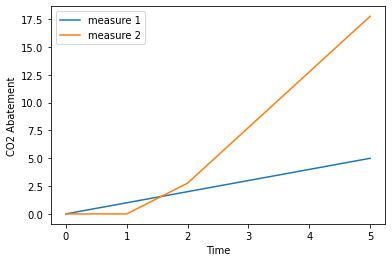

In [13]:
# plot CO2 abatements
x = np.zeros(len(TIME))
y = np.zeros(len(TIME))
for t in TIME:
    x[t] = a[(0, t)].varValue 
    y[t] = a[(1, t)].varValue

plt.plot(TIME, x, label = "measure 1")
plt.plot(TIME, y, label = "measure 2")
plt.xlabel('Time')
plt.ylabel('CO2 Abatement')
plt.legend()
plt.show()

No handles with labels found to put in legend.


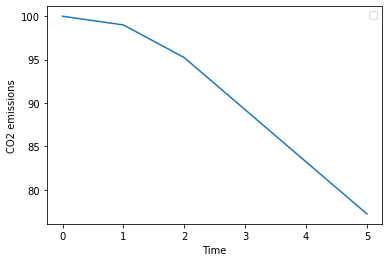

In [14]:
# plot CO2 emissions
z = np.zeros(len(TIME))
for t in TIME:
    z[t] = e[t].varValue

plt.plot(TIME, z)
plt.xlabel('Time')
plt.ylabel('CO2 emissions')
plt.legend()
plt.show()